<a href="https://colab.research.google.com/github/ShahinGanbar/QSS_tasks/blob/main/week4_cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import re
import seaborn as sns
import matplotlib.pyplot as plt
import copy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder


In [ ]:
file_path = '/content/drive/MyDrive/Python/covid_19_data.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.head(0)

,sno,observationdate,province/state,country/region,last_update,confirmed,deaths,recovered
sno,,,,,,,,


In [ ]:
df.index = df.sno

In [ ]:
df.drop('sno',axis=1, inplace=True)


In [ ]:
df.head(30)

,observationdate,province/state,country/region,last_update,confirmed,deaths,recovered
sno,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0


In [ ]:
df.shape

(6722, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6722 entries, 1 to 6722
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   observationdate  6722 non-null   object 
 1   province/state   3953 non-null   object 
 2   country/region   6722 non-null   object 
 3   last_update      6722 non-null   object 
 4   confirmed        6722 non-null   float64
 5   deaths           6722 non-null   float64
 6   recovered        6722 non-null   float64
dtypes: float64(3), object(4)
memory usage: 420.1+ KB


In [ ]:
df.describe()

,confirmed,deaths,recovered
count,6722.000000,6722.000000,6722.000000
mean,601.195924,19.855846,226.341267
std,4896.332140,204.486922,2556.035202
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000
75%,108.000000,1.000000,11.000000
max,67800.000000,3122.000000,56927.000000


Data Cleaning

In [ ]:
df.shape


(6722, 7)

In [ ]:
df.isnull().sum()

,0
observationdate,0
province/state,2769
country/region,0
last_update,0
confirmed,0
deaths,0
recovered,0


<Axes: >

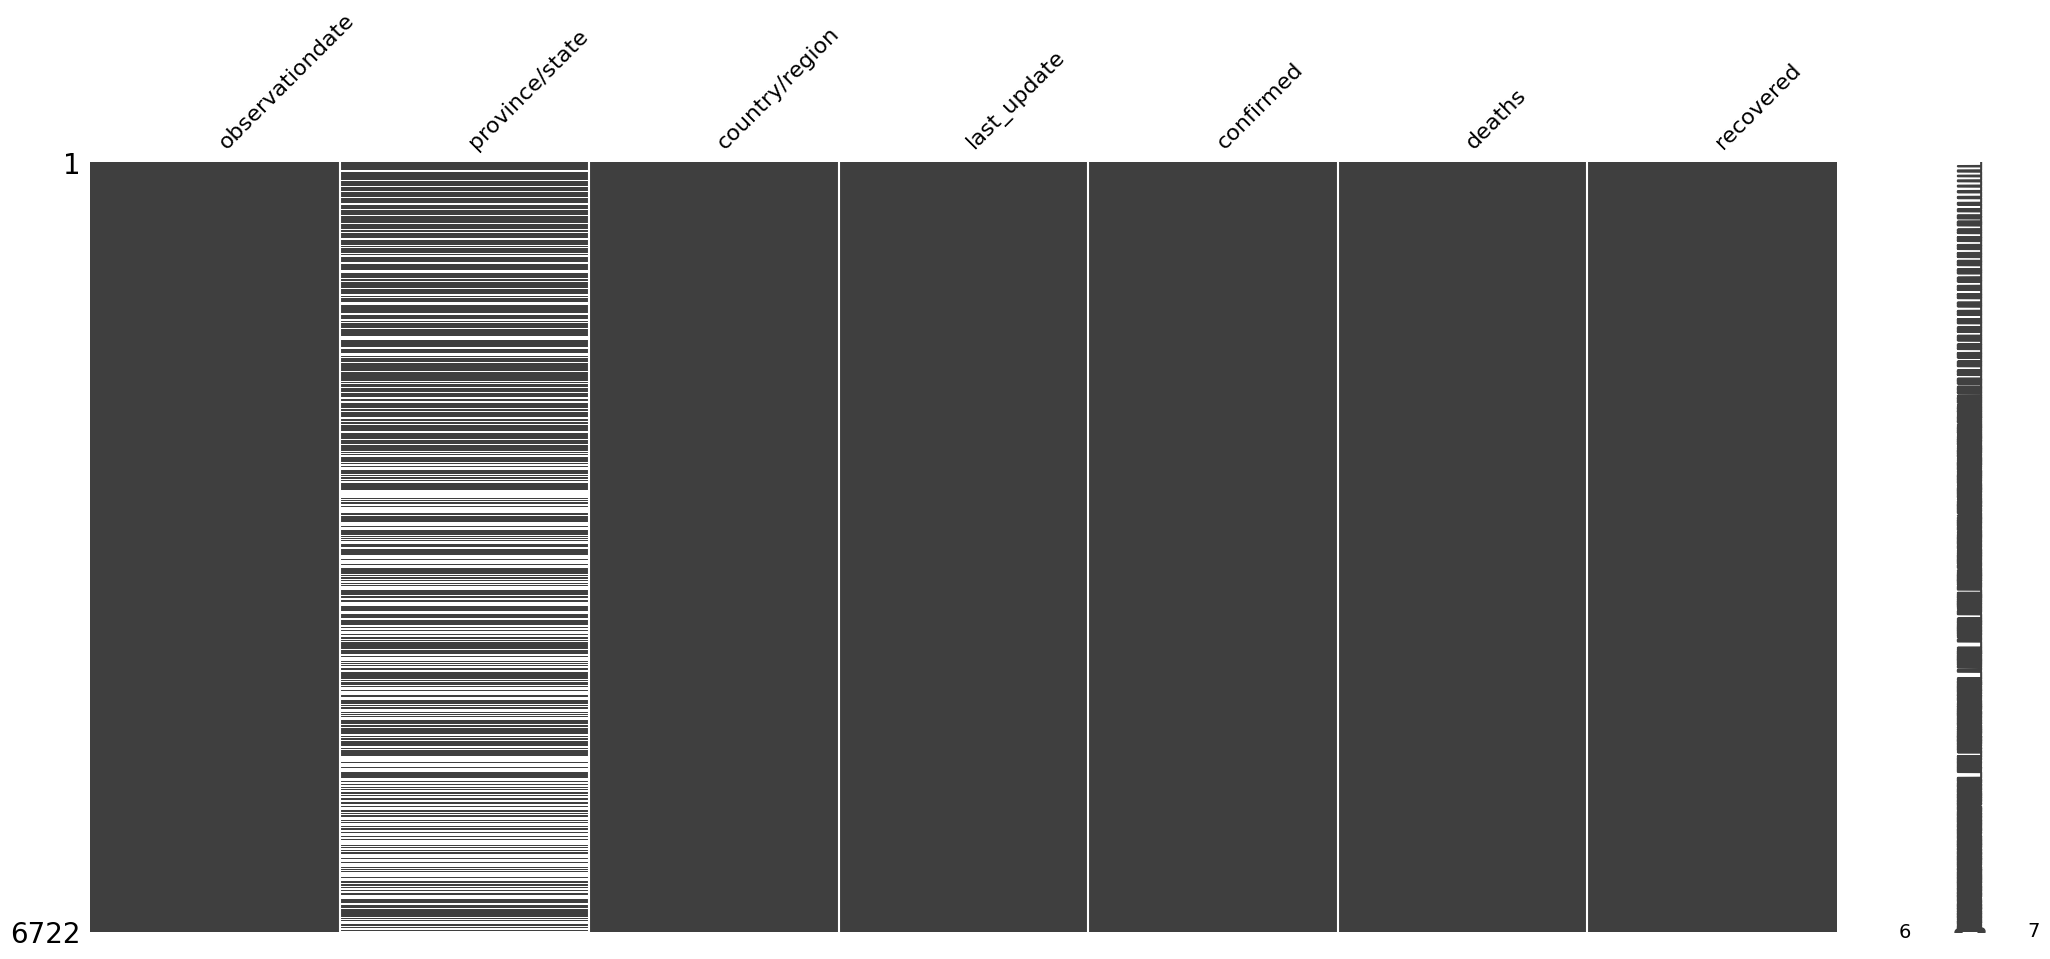

In [ ]:
msno.matrix(df)

<Axes: >

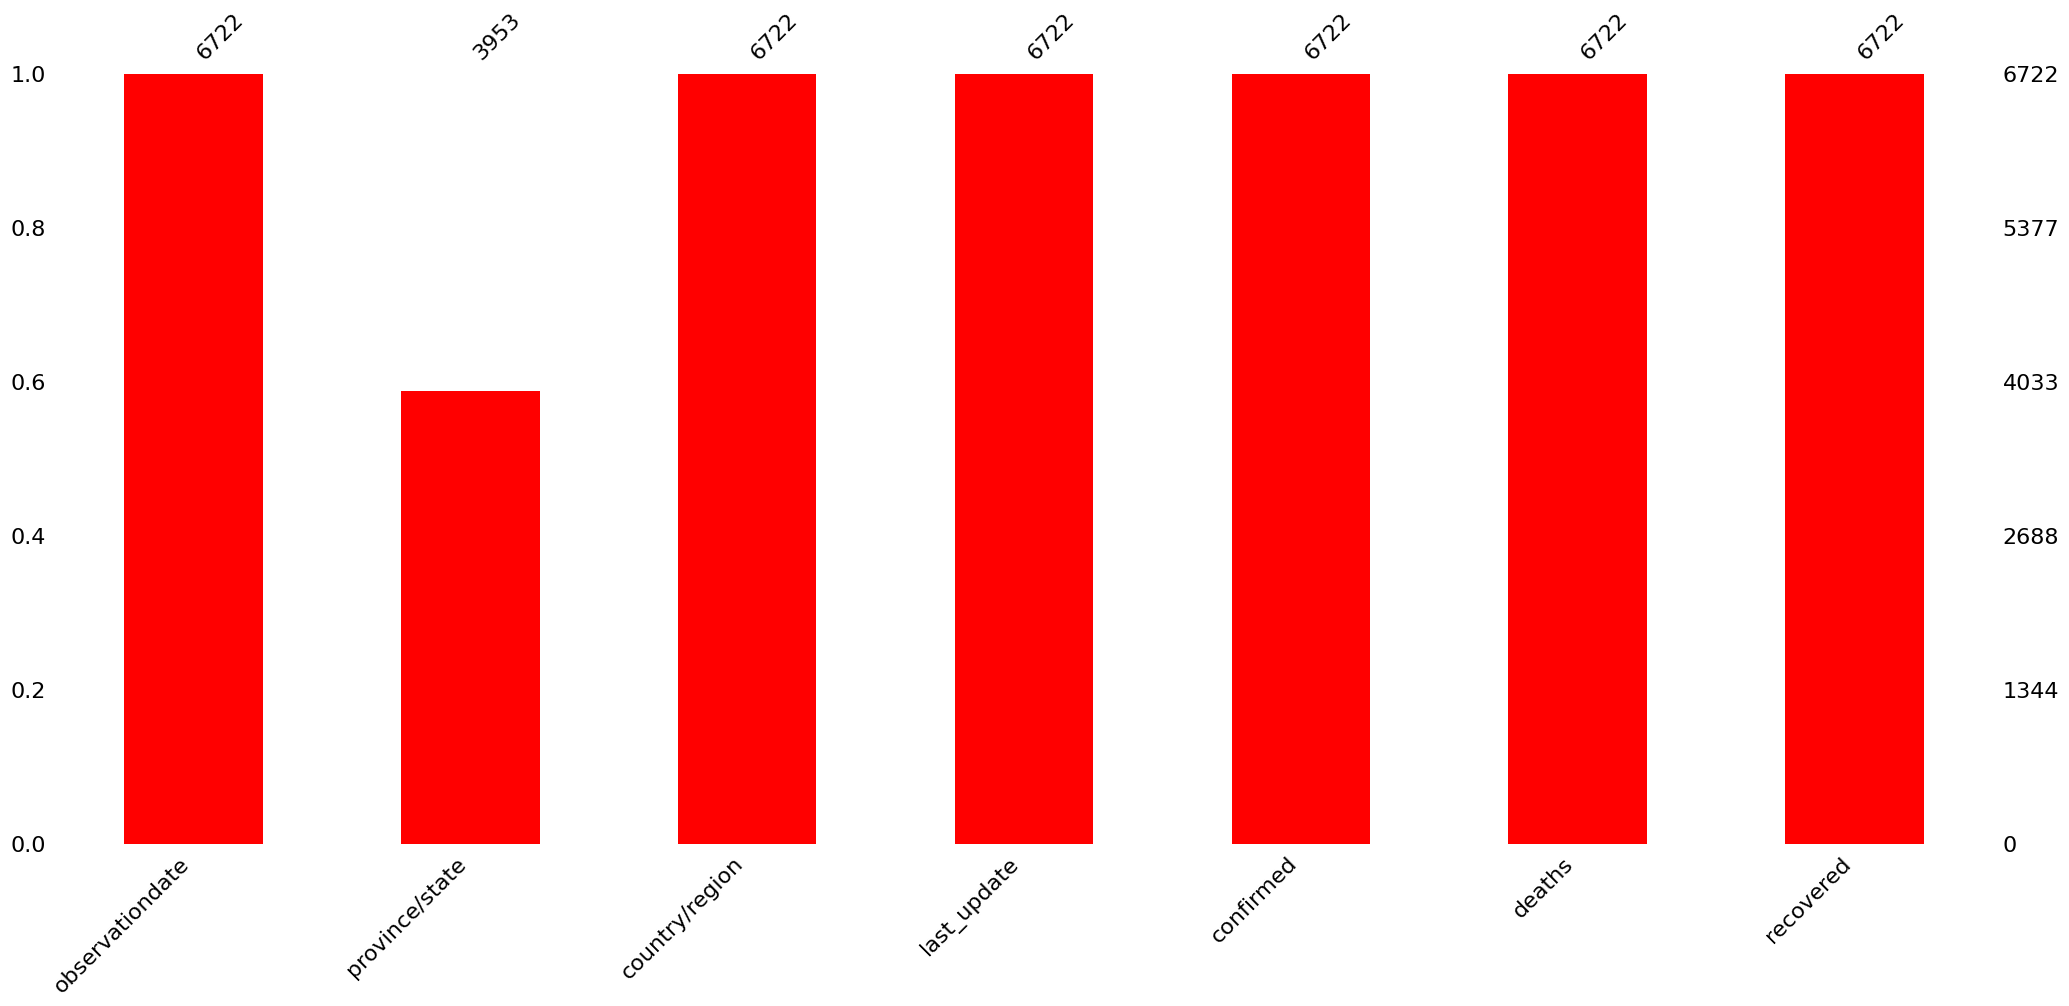

In [ ]:
msno.bar(df,color='r')

In [ ]:
df.isnull().sum() / df.shape[0]


,0
observationdate,0.000000
province/state,0.411931
country/region,0.000000
last_update,0.000000
confirmed,0.000000
deaths,0.000000
recovered,0.000000


In [ ]:
mode_value = df['province/state'].mode()[0]
df_filled = df.fillna(mode_value,inplace=False)

In [ ]:
df_filled.isnull().sum()

,0
observationdate,0
province/state,0
country/region,0
last_update,0
confirmed,0
deaths,0
recovered,0


In [ ]:
new_values = {
    'observationdate': 'observation_date',
    'province/state': 'province',
    'country/region': 'country'
}

In [ ]:
df_filled.rename(columns=new_values,inplace=True)

In [ ]:
df_filled.head()

,observation_date,province,country,last_update,confirmed,deaths,recovered
sno,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Country Column Analysis


In [ ]:
sorted(df_filled.country.unique())

[' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras

In [ ]:

df_pure = copy.deepcopy(df_filled[['observation_date','country','confirmed','deaths','recovered']])
df_pure.sample(10,random_state=101)

,observation_date,country,confirmed,deaths,recovered
sno,,,,,
1424,02/14/2020,Mainland China,537.0,5.0,152.0
5779,03/15/2020,US,17.0,0.0,0.0
1030,02/08/2020,UK,3.0,0.0,0.0
3337,03/04/2020,Hungary,2.0,0.0,0.0
407,01/30/2020,Mainland China,1.0,0.0,0.0
5987,03/16/2020,Slovakia,63.0,0.0,0.0
2660,02/28/2020,US,2.0,0.0,0.0
2946,03/02/2020,Italy,2036.0,52.0,149.0
4217,03/08/2020,US,1.0,0.0,0.0


In [ ]:
df['country'].nunique()

179

In [ ]:
encoder = LabelEncoder()
df_pure['country'] = encoder.fit_transform(df_pure['country'])
df_pure.sample(10,random_state=101)

,observation_date,country,confirmed,deaths,recovered
sno,,,,,
1424,02/14/2020,98,537.0,5.0,152.0
5779,03/15/2020,169,17.0,0.0,0.0
1030,02/08/2020,168,3.0,0.0,0.0
3337,03/04/2020,72,2.0,0.0,0.0
407,01/30/2020,98,1.0,0.0,0.0
5987,03/16/2020,147,63.0,0.0,0.0
2660,02/28/2020,169,2.0,0.0,0.0
2946,03/02/2020,80,2036.0,52.0,149.0
4217,03/08/2020,169,1.0,0.0,0.0


Data Preproccessing

In [ ]:
df_pure.drop('country',axis=1,inplace=True)


In [ ]:
df_pure.head()

,observation_date,confirmed,deaths,recovered
sno,,,,
1,01/22/2020,1.0,0.0,0.0
2,01/22/2020,14.0,0.0,0.0
3,01/22/2020,6.0,0.0,0.0
4,01/22/2020,1.0,0.0,0.0
5,01/22/2020,0.0,0.0,0.0


Data Preparation

In [ ]:
df_pure.groupby(['observation_date']).sum().head()

,confirmed,deaths,recovered
observation_date,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0


In [ ]:
df_pure = df_pure.groupby(['observation_date']).sum().reset_index()

In [ ]:
df_pure.shape

(57, 4)

In [ ]:
df_pure.head()

,observation_date,confirmed,deaths,recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [ ]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  57 non-null     object 
 1   confirmed         57 non-null     float64
 2   deaths            57 non-null     float64
 3   recovered         57 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.9+ KB


In [ ]:
df_pure['observation_date'] = pd.to_datetime(df_pure['observation_date'])


In [ ]:
df_pure.head()

,observation_date,confirmed,deaths,recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0


Feature Engineering


In [ ]:
x = df_pure['observation_date'].max()
n = df_pure['observation_date'].min()


In [ ]:
x

Timestamp('2020-03-18 00:00:00')

In [ ]:
n

Timestamp('2020-01-22 00:00:00')

In [ ]:
(x-n)

Timedelta('56 days 00:00:00')

In [ ]:
(x-n).days

56

In [ ]:
def subtraction(date):
  return (date-n).days + 1

In [ ]:
df_pure['day_counter'] = df_pure['observation_date'].apply(lambda x: subtraction(x))
df_pure.drop('observation_date',axis=1,inplace=True)

In [ ]:
df_pure.head()

,confirmed,deaths,recovered,day_counter
0,555.0,17.0,28.0,1
1,653.0,18.0,30.0,2
2,941.0,26.0,36.0,3
3,1438.0,42.0,39.0,4
4,2118.0,56.0,52.0,5


In [ ]:
df_pure['infected'] = df_pure['confirmed'] - (df_pure['recovered']-df_pure['deaths'])
df_pure.head()

,confirmed,deaths,recovered,day_counter,infected
0,555.0,17.0,28.0,1,544.0
1,653.0,18.0,30.0,2,641.0
2,941.0,26.0,36.0,3,931.0
3,1438.0,42.0,39.0,4,1441.0
4,2118.0,56.0,52.0,5,2122.0


Confirmed Prediction

In [ ]:
y = df_pure['confirmed']
X = df_pure[['day_counter']]


In [ ]:
type(df_pure['confirmed'])
type(df_pure[['day_counter']])

pandas.core.frame.DataFrame

In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)



Modelling

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_train

,day_counter
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
X_test

,day_counter
45,46
46,47
47,48
48,49
49,50
50,51
51,52
52,53
53,54
54,55


Predicitions and Metrics

In [ ]:
y_predicted = model.predict(X_test)


r_2 = r2_score(y_true=y_test,y_pred=y_predicted)
print(r_2)

-0.030541370145990454


In [ ]:
mse = mean_squared_error(y_true=y_test,y_pred=y_predicted)
print(mse)

1255684927.567046


In [ ]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_predicted)
print(mae)

24708.904589371978


Visualization

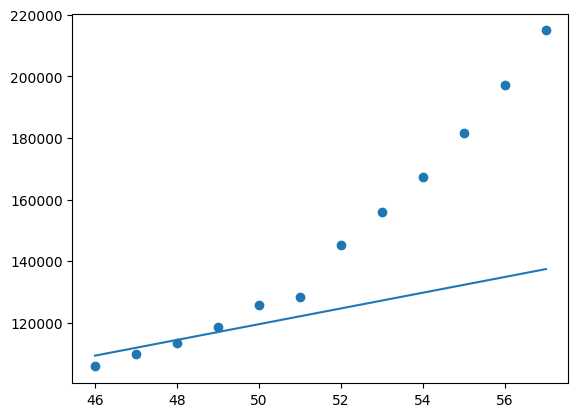

In [ ]:
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_predicted)
plt.show()

Death Prediction

In [ ]:
X = df_pure['day_counter']
y = df_pure['deaths']


In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [ ]:
y_predicted = model.predict(X_test.values.reshape(-1,1))
r_2 = r2_score(y_true=y_test,y_pred=y_predicted)
print(r_2)

-0.5551786359945339


In [ ]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_predicted)
print(mae)
mse = mean_squared_error(y_true=y_test,y_pred=y_predicted)
print(mse)

1528.3739569609127
4108280.184390566


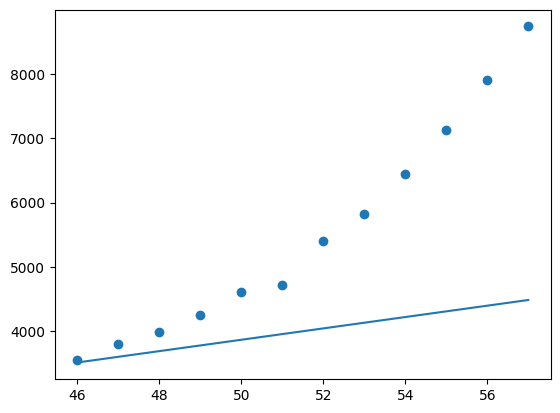

In [ ]:
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_predicted)
plt.show()

Recovered Prediction

In [ ]:
X = df_pure['day_counter']
y = df_pure['recovered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
y_predicted = model.predict(X_test.values.reshape(-1, 1))
r_2 = r2_score(y_true=y_test, y_pred=y_predicted)
print(r_2)


0.8568471450120799


In [ ]:
mse = mean_squared_error(y_true=y_test, y_pred=y_predicted)
print(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=y_predicted)
print(mae)

105388263.08222397
8733.507061657923


Infected Prediction

In [ ]:
X = df_pure['day_counter']
y = df_pure['infected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = model.predict(X_test.values.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 238220533.41484526


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 11396.504605624199


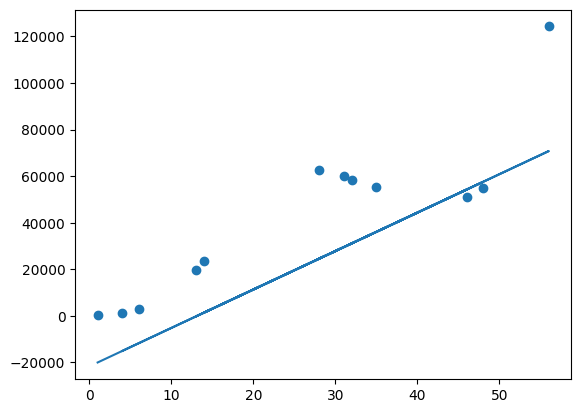

In [ ]:
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_predicted)
plt.show()